# June, 26th, 2021

**Motivation**: Clean up. Added Parcellation and Hierarchical objects <br>


In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')

# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.register import load_allen, load_bg_atlas
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
# from analysis.network import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load & prepare

### Allen & Atlas

In [3]:
start = time()
mice = Mice(Config(128))
end = time()

allen = load_allen()
atlas = load_bg_atlas()

_ = convert_time(end - start)

...merging dicts: 0it [00:00, ?it/s]

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


00 - 00:00:04  (dd - hh:mm:ss)

### parcellation

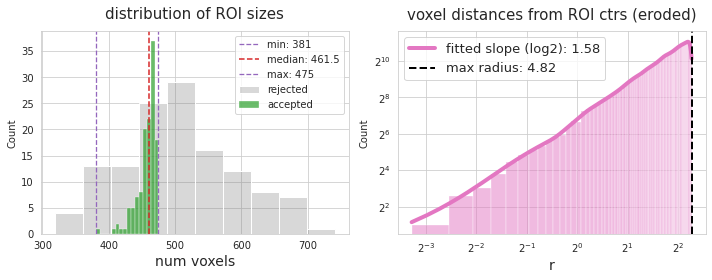

00 - 00:00:02  (dd - hh:mm:ss)

In [4]:
start = time()
parcellation = Parcellation(mice.cfg, allen)
end = time()

_ = convert_time(end - start)

In [5]:
list(parcellation.results['major_masks'].keys())

[
    'STR',
    'PAL',
    'OLF',
    'CTXsp',
    'HPF',
    'VIS',
    'TEa',
    'PERI',
    'ECT',
    'RSP',
    'AUD',
    'PTLp',
    'VISC',
    'SS',
    'SSp',
    'SSp-bfd',
    'SSp-ll',
    'SSp-m',
    'SSp-n',
    'SSp-tr',
    'SSp-ul',
    'SSp-un',
    'SSs',
    'GU',
    'ACA',
    'AI',
    'MO',
    'MOp',
    'MOs',
    'ILA',
    'PL',
    'ORB',
    'FRP'
]

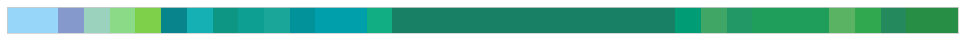

In [6]:
struct_cmap = make_cmap(
    ramp_colors=list(parcellation.results['major_colors'].values()),
    n_colors=len(parcellation.results['major_colors']),
    name='structs',
)

### Combine all data

In [7]:
selected_experiments = [v for k, v in mice.bold_df_piv.items() if mice.bold[k].task == 'rest']
df_combined = pd.concat(selected_experiments)
node_labels = df_combined.columns.values.tolist()
node_labels = {i: lbl for i, lbl in enumerate(node_labels)}

df_combined.shape, len(node_labels), len(mice.bold_df_piv), len(selected_experiments)

((62700, 138), 138, 204, 114)

## Hierarchical clustering

In [18]:
start = time()
hier = Hierarchical(df_combined, parcel=parcellation)
cluster, hier_output = hier.fit(0)
end = time()

_ = convert_time(end - start)

00 - 00:00:06  (dd - hh:mm:ss)

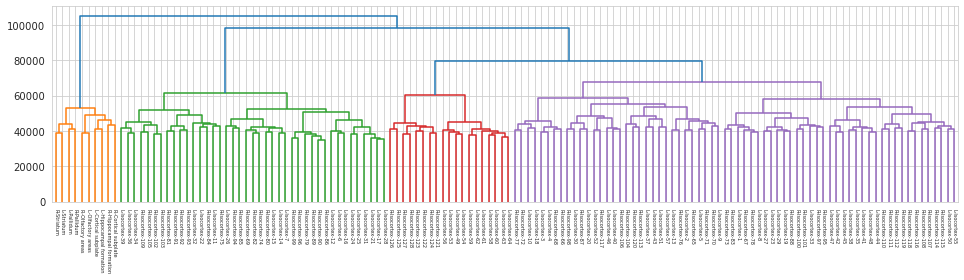

In [19]:
display(hier_output['fig'])

### All clusters

In [20]:
cluster_color_idxs = {
    2: [17, 0],
    3: [17, 8, 12], 
    4: [17, 8, 12, 14],
    5: [17, 8, 12, 4, 0],
    6: [17, 8, 10, 12, 4, 0],
    7: [17, 8, 10, 12, 14, 4, 0],
    8: [17, 8, 10, 12, 14, 4, 6, 0],
    9: [17, 8, 10, 12, 14, 4, 6, 0, 2],
    10: [17, 8, 10, 12, 14, 4, 6, 7, 0, 2],
    11: [17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2],
    12: [17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    13: [16, 17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    14: [16, 17, 8, 10, 11, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    15: [16, 17, 8, 9, 10, 11, 12, 14, 4, 5, 6, 7, 0, 2, 3],
}

n_clusters = 2

#1f77b4,"['(10)', '(128)']"


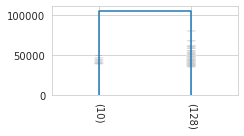

[PROGRESS] 'full-regions_n-2.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-2.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 3

#1f77b4,"['(10)', '(41)', '(87)']"


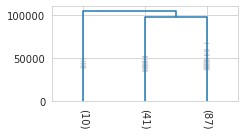

[PROGRESS] 'full-regions_n-3.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-3.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 4

#1f77b4,"['(10)', '(41)', '(19)', '(68)']"


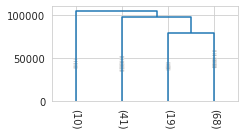

[PROGRESS] 'full-regions_n-4.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-4.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 5

#1f77b4,"['(10)', '(41)', '(19)']"
#ff7f0e,"['(32)', '(36)']"


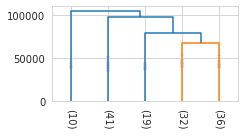

[PROGRESS] 'full-regions_n-5.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-5.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 6

#1f77b4,"['(10)', '(19)']"
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(32)', '(36)']"


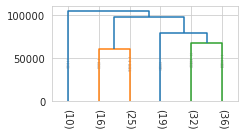

[PROGRESS] 'full-regions_n-6.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-6.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 7

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(32)', '(36)']"


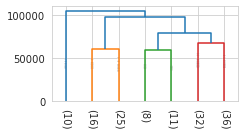

[PROGRESS] 'full-regions_n-7.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-7.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 8

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(8)', '(24)', '(36)']"


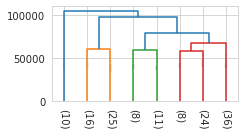

[PROGRESS] 'full-regions_n-8.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-8.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 9

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(20)', '(8)', '(24)', '(16)']"


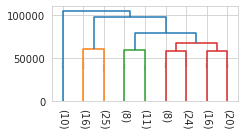

[PROGRESS] 'full-regions_n-9.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-9.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 10

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(8)', '(9)', '(15)', '(16)', '(20)']"


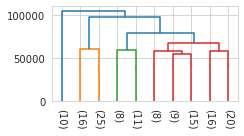

[PROGRESS] 'full-regions_n-10.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-10.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 11

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(8)', '(9)', '(7)', '(8)', '(16)', '(20)']"


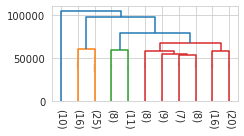

[PROGRESS] 'full-regions_n-11.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-11.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 12

#1f77b4,['(10)']
#ff7f0e,"['(16)', '(25)']"
#2ca02c,"['(8)', '(11)']"
#d62728,"['(8)', '(9)', '(7)', '(8)', '(16)', '(8)', '(12)']"


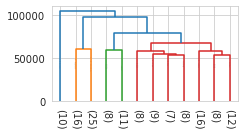

[PROGRESS] 'full-regions_n-12.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-12.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 13

#ff7f0e,"['(4)', '(6)']"
#2ca02c,"['(16)', '(25)']"
#d62728,"['(8)', '(11)']"
#9467bd,"['(8)', '(9)', '(7)', '(8)', '(16)', '(8)', '(12)']"


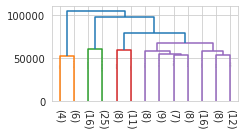

[PROGRESS] 'full-regions_n-13.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-13.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 14

#ff7f0e,"['(4)', '(6)']"
#2ca02c,"['(16)', '(10)', '(15)']"
#d62728,"['(8)', '(11)']"
#9467bd,"['(8)', '(9)', '(7)', '(8)', '(16)', '(8)', '(12)']"


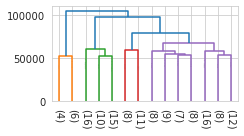

[PROGRESS] 'full-regions_n-14.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-14.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 15

#ff7f0e,"['(4)', '(6)']"
#2ca02c,"['(7)', '(9)', '(10)', '(15)']"
#d62728,"['(8)', '(11)']"
#9467bd,"['(8)', '(9)', '(7)', '(8)', '(16)', '(8)', '(12)']"


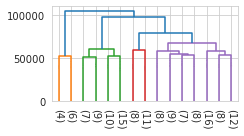

[PROGRESS] 'full-regions_n-15.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'full-clusters_n-15.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

In [21]:
for n_clusters in range(2, 16):
    cluster, hier_output = hier.fit(
        n_clusters=n_clusters,
        c_list=cluster_color_idxs[n_clusters],
        leaf_font_size=10,
        figsize=(3.5, 2),
    )
    print(f"n_clusters = {n_clusters}")
    display(hier_output['cluster_classes'])
    display(hier_output['fig'])
    display(sns.color_palette(hier_output['cluster_colors'].values()))

    # export results
    _ = cluster.export(extras_dir, 'full')
    print('\n\n')

In [22]:
hier.results

{
    0: <analysis.cluster.Clusters object at 0x7f91fd1893d0>,
    2: <analysis.cluster.Clusters object at 0x7f91fd1b81c0>,
    3: <analysis.cluster.Clusters object at 0x7f91c92caf70>,
    4: <analysis.cluster.Clusters object at 0x7f91fd114760>,
    5: <analysis.cluster.Clusters object at 0x7f91fd114430>,
    6: <analysis.cluster.Clusters object at 0x7f91c948b4c0>,
    7: <analysis.cluster.Clusters object at 0x7f91c953e460>,
    8: <analysis.cluster.Clusters object at 0x7f91c9509580>,
    9: <analysis.cluster.Clusters object at 0x7f91c9863a30>,
    10: <analysis.cluster.Clusters object at 0x7f91d87ba310>,
    11: <analysis.cluster.Clusters object at 0x7f91fd2ca730>,
    12: <analysis.cluster.Clusters object at 0x7f91d87ac280>,
    13: <analysis.cluster.Clusters object at 0x7f91fe1b05e0>,
    14: <analysis.cluster.Clusters object at 0x7f91d87e5f40>,
    15: <analysis.cluster.Clusters object at 0x7f91fe1b8a00>
}

### Embed table

In [23]:
n_clusters = 5
file = f"../../_extras/full-regions_n-{n_clusters}.html"
IFrame(file, width=1000, height=550)

## Render

In [24]:
for n, cluster in hier.results.items():
    _ = cluster2html(
        cluster=cluster,
        save_name='full',
        n_cortex_regions=hier.parcel['n_cortical_regions'],
        save_dir=extras_dir,
    )

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-4.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-2.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-3.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-4.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-5.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-6.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-7.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-8.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-9.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-10.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-11.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-12.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-13.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-14.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/cluster3d-full_parcel-128_n-15.html

### Embed 3d

In [25]:
n_clusters = 5
file = f"../../_extras/cluster3d-full_parcel-{mice.cfg.n_cortex_regions}_n-{n_clusters}.html"
IFrame(file, width=1000, height=700)

## Report properties of a parcellation (TODO)
> use this:
```Python
import pyinspect as pi
```

In [ ]:
    def content(self):
        """
        Prints an overview of the Actors in the scene.
        """

        actors = pi.Report(
            "Scene actors", accent=salmon, dim=orange, color=orange
        )

        for act in self.actors:
            actors.add(
                f"[bold][{amber}]- {act.name}[/bold][{orange_darker}] "
                f"(type: [{orange}]{act.br_class}[/{orange}]) "
                f"(color: [{orange}]{rgb2hex(act.mesh.c())}[/{orange}]) "
                f"(alpha: [{orange}]{act.mesh.alpha()}[/{orange}]) "
            )

        if "win32" != sys.platform:
            actors.print()
        else:
            print(pi.utils.stringify(actors, maxlen=-1))